 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 05 : Dynamic Time Warping (DTW)  </b>


We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<h4> <b> Part (a). Dynamic Time Warping(DTW): </b>  In this part you need to try and implement the basic sequence matching algorithm DTW. </h4>
<dt> <h4> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br> </h4> </dt>
<dt> <h4> Now the distance is computed as </h4> </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center> </h4> </dt>
<dt> <h4> There are two main issues </h4> </dt>
<dd> <h4> 1. What if the sequences are not aligned in time ?</h4> </dt>
<dd> <h4> 2. What if the sequences have varying lengths ?</h4> </dt>
<dt> <h4> The non-linear alignment path produces a better similarity measure. </h4> </dt>

![picture](https://drive.google.com/uc?export=view&id=1XWTK0XUpDIuf-5nbe7pk6uPx29-22zF0)

<dt> <h4> <b> Algorithm </b> </h4> </dt>
<dt> <h4>  1. Compute distance matrix $D_{M\times N}$ between A and B </h4> </dt>
<dt> <h4>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B </h4> </dt>
<dd> <h4>  ~ Initialize: C(0,0) = D(0,0) </h4> </dd>
<dd> <h4>  ~ for i=1,2,..M and j=1,2,...N  <dd> <h4>  ~ Update C <dd> <h4> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> <dd> <h4>  ~ Store the best Path <dd> <h4> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> </h4> </dd>
<dt> <h4>  3. C(M,N) gives the similarity measure </h4> </dt>
<dt> <h4>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center></h4> </dt>
<dt> <h4> <b> Programming question </b> </h4> </dt>
<dt> <h4>  1. Consider the following two sequences $A = [4,3,7,0,2,6,5]$, and $B = [3,7,1,6,1,5,4,4]$. Write a DTW algorithm to find the optimal similarity/distance between them. </h4> </dt>
<dd> <h4> - Compute the distance matrix between the two sequences </dd> </h4>
<dd> <h4> - Compute the accumulative distance matrix </dd> </h4>
<dd> <h4> - Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance </dd> </h4>
<dd> <h4> - Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes </dd> </h4>



9.0


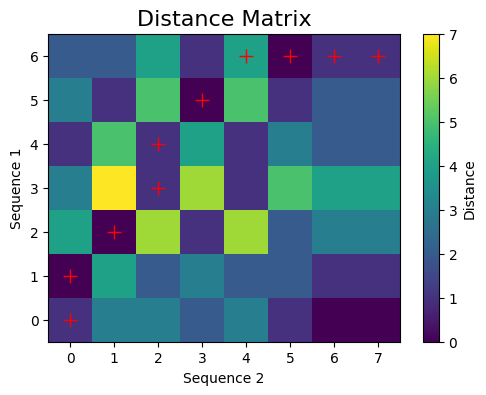

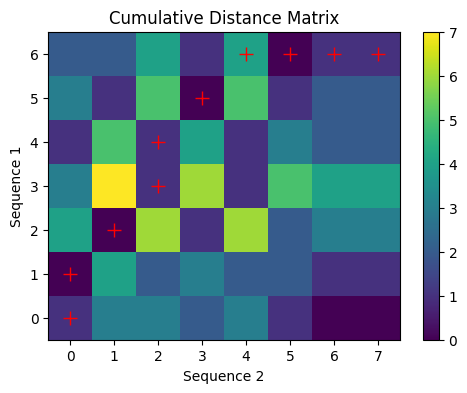

In [3]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################
def DTW(sequence1,sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################
    N = len(sequence1)
    M = len(sequence2)
    D = np.zeros((N,M))
    P = np.zeros((N,M))
    for i in range(N):
      for j in range(M):
        D[i][j] = abs(sequence1[i]-sequence2[j])

    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix =  np.zeros((N,M))  #Cummulative distance matrix
    DTW_cumulate_Matrix[0][0] = D[0][0]
    for i in range(1,len(sequence1),1):
      DTW_cumulate_Matrix[i][0] = DTW_cumulate_Matrix[i-1][0] + abs(sequence1[i]-sequence2[0])
    for j in range(1,len(sequence2),1):
      DTW_cumulate_Matrix[0][j] = DTW_cumulate_Matrix[0][j-1] + abs(sequence1[0]-sequence2[j])
    #Iterate through the sequence of points in sequences and compute the distance between the sequences.
    for i in range(1,len(sequence1),1): #you can start from 1
        for j in range(1,len(sequence2),1):
            current_distance =  D[i][j]    #Compute the distance between the two points

            DTW_cumulate_Matrix[i][j] = current_distance + min(DTW_cumulate_Matrix[i-1][j],DTW_cumulate_Matrix[i-1][j-1],DTW_cumulate_Matrix[i][j-1])
            P[i][j] = min(DTW_cumulate_Matrix[i-1][j],DTW_cumulate_Matrix[i-1][j-1],DTW_cumulate_Matrix[i][j-1])
            #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"



    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    opt_distance = 0.0
    i =  N-1# length of the sequence1
    j =  M-1# length of the sequence2
    rows = []
    cols = []
    while i!=0 and j!=0: #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
        min_dis = min(DTW_cumulate_Matrix[i-1][j],DTW_cumulate_Matrix[i-1][j-1],DTW_cumulate_Matrix[i][j-1])
        if min_dis == DTW_cumulate_Matrix[i-1][j-1]:
          i = i - 1
          j = j - 1
        elif min_dis == DTW_cumulate_Matrix[i-1][j]:
          i = i - 1
          j = j
        elif min_dis == DTW_cumulate_Matrix[i][j-1]:
          i = i
          j = j - 1

        # Add the current indexes distance
        opt_distance = DTW_cumulate_Matrix[N-1][M-1] #Compute the distance between the points sequence1[i] and sequence2[j]

        #Store the required indexes to obtain the optimal path
        rows.append(i)
        cols.append(j)

    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################
    return opt_distance,rows,cols,D,DTW_cumulate_Matrix



def plotDTWpath(sequence1,sequence2,rows,cols,Distance_matrix,DTW_cumulative_matrix):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################
    N = len(sequence1)
    M = len(sequence2)
    # Set up the figure and adjust the aspect ratio
    plt.figure(figsize=(6, 4))

    # Plot the Distance Matrix with viridis colormap
    plt.imshow(Distance_matrix, origin='lower', cmap='viridis', interpolation='nearest')

    # Add title and adjust font size
    plt.title('Distance Matrix', fontsize=16)

    # Add colorbar with label
    plt.colorbar(label='Distance')

    # Plot the optimal path
    for i in range(len(rows)):
         plt.plot(cols[i], rows[i], 'r+', markersize=10)

    # Plot start and end points
    plt.plot(0, 0, 'r+', markersize=10, linewidth=2, label='Start')
    plt.plot(M-1,N-1, 'r+', markersize=10, linewidth=2, label='End')

    # Add axis labels and adjust font size
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')

    # Add grid lines
    #plt.grid(True)

    plt.show()


    plt.figure(figsize=(6, 4))
    plt.imshow(Distance_matrix, origin='lower', cmap='viridis', interpolation='nearest')
    plt.title('Cumulative Distance Matrix')

    plt.colorbar()
    for i in range(len(rows)):
        plt.plot(cols[i], rows[i], 'r+', markersize=10, linewidth=10)
    plt.plot(0,0,'r+',markersize=10,linewidth=10)
    plt.plot(M-1,N-1,'r+',markersize=10,linewidth=10)

    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')
    #plt.grid()

    plt.show()

    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes

sequence1 = [4,3,7,0,2,6,5]
sequence2 = [3,7,1,6,1,5,4,4]
opt_dis,rows,cols,Distance_matrix,DTW_cumulative_matrix = DTW(sequence1,sequence2)
print(opt_dis)
plotDTWpath(sequence1,sequence2,rows,cols,Distance_matrix,DTW_cumulative_matrix)

<b> Report your observations </b>

1.Minimum optimal distance is coming out to be 9

2.If the sequence are same that means if they match completely then path is along diagonal and min optimal distance comes out to be 0

3.If the sequence did not match then they deviate from the diagnol




<dt> <h4> <b> Part (b): </b> In this part of the assignment, we expect you to build the Isolated digit recognition system with the help of the above written DTW algorithm. </dt> </h4>

![picture](https://drive.google.com/uc?export=view&id=1nGtWwbDg8PJBNwck_dUt2mmsCBshrGYc)



<dt> <h4> 1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. </dt> </h4>
<dt> <h4> 2. Record three further repetitions of the same digits (Isolated words) as test data. </dt> </h4>  
<dt> <h4> 3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals. </dt> </h4>  
<dt> <h4> 4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes. </dt> </h4>
<dt> <h4> 5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   </dt> </h4>
<dt> <h4> 6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. </dt> </h4>
<dt> <h4> 7. Create a confusion matrix and report the most confusing digits. </dt> </h4>


**Module to record the voice in online mode**

In [2]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

import scipy.io.wavfile as wav
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy
import numpy as np

from IPython.display import Audio

  Preparing metadata (setup.py) ... done


In [41]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

import scipy.io.wavfile as wav
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy
import numpy as np

from IPython.display import Audio


RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=1):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio
recorded_numbers = []

# Loop to record 10 numbers


In [44]:
for i in range(10):
    print(f"Recording number {i+1}:")
    audio = record()


    wavfile = f'recorded_audio_{i+1}.wav'
    audio.export(wavfile, format="wav")

    # Display the recorded audio
    display(Audio(wavfile))

    # Append the recorded audio to the list
    recorded_numbers.append(wavfile)


Output hidden; open in https://colab.research.google.com to view.

In [45]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os
from IPython.display import Audio

# Importing necessary libraries for recording
from google.colab import output
from base64 import b64decode
from io import BytesIO
from pydub import AudioSegment

In [46]:


# Function to record audio
def record(duration=1.0):
    RECORD = """
    const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
    const b2text = blob => new Promise(resolve => {
      const reader = new FileReader()
      reader.onloadend = e => resolve(e.srcElement.result)
      reader.readAsDataURL(blob)
    })
    var record = time => new Promise(async resolve => {
      stream = await navigator.mediaDevices.getUserMedia({ audio: true })
      recorder = new MediaRecorder(stream)
      chunks = []
      recorder.ondataavailable = e => chunks.push(e.data)
      recorder.start()
      await sleep(time)
      recorder.onstop = async ()=>{
        blob = new Blob(chunks)
        text = await b2text(blob)
        resolve(text)
      }
      recorder.stop()
    })
    """

    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (duration*1000))
    b = b64decode(s.split(',')[1])
    audio = AudioSegment.from_file(BytesIO(b))
    return audio

for i in range(10):  # For each number
    print(f"Recording number {i+1}...")
    for j in range(3):  # For each repetition
        print(f"Repetition {j+1}:")
        audio = record()

        # Save the recorded audio to a WAV file
        wavfile = f'recorded_audio_{i+1}_{j+1}.wav'
        audio.export(wavfile, format="wav")

        # Display the recorded audio
        display(Audio(wavfile))


Output hidden; open in https://colab.research.google.com to view.

**Algorithm to perform isolated digit recognition**

**Plot the optimal DTW path**

In [11]:
def extract_mfcc(audio_file, numcep=6):
    """
    Extract MFCC features from an audio file.

    Args:
    - audio_file (str): Path to the audio file.
    - numcep (int): Number of MFCC coefficients to extract (default is 13).

    Returns:
    - mfcc_features (numpy.ndarray): 2D array of MFCC features.
    """

    rate, signal = wav.read(audio_file)

    # Extract MFCC features
    mfcc_features = mfcc(signal, rate, numcep=numcep,winlen=0.005)

    return mfcc_features

In [10]:
def vector_dtw(sequence1,sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################
    N = len(sequence1)
    M = len(sequence2)
    D = np.zeros((N,M))
    P = np.zeros((N,M))
    for i in range(N):
      for j in range(M):
        D[i][j] = np.mean(abs(sequence1[i]-sequence2[j]))

    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix =  np.zeros((N,M))  #Cummulative distance matrix
    DTW_cumulate_Matrix[0][0] = D[0][0]
    for i in range(1,len(sequence1),1):
      DTW_cumulate_Matrix[i][0] = DTW_cumulate_Matrix[i-1][0] + np.mean(abs(sequence1[i]-sequence2[0]))
    for j in range(1,len(sequence2),1):
      DTW_cumulate_Matrix[0][j] = DTW_cumulate_Matrix[0][j-1] + np.mean(abs(sequence1[0]-sequence2[j]))
    #Iterate through the sequence of points in sequences and compute the distance between the sequences.
    for i in range(1,len(sequence1),1): #you can start from 1
        for j in range(1,len(sequence2),1):
            current_distance =  D[i][j]    #Compute the distance between the two points

            DTW_cumulate_Matrix[i][j] = current_distance + min(DTW_cumulate_Matrix[i-1][j],DTW_cumulate_Matrix[i-1][j-1],DTW_cumulate_Matrix[i][j-1])
            P[i][j] = min(DTW_cumulate_Matrix[i-1][j],DTW_cumulate_Matrix[i-1][j-1],DTW_cumulate_Matrix[i][j-1])
            #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"



    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    opt_distance = 0.0
    i =  N-1# length of the sequence1
    j =  M-1# length of the sequence2
    rows = []
    cols = []
    while i!=0 and j!=0: #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
        min_dis = min(DTW_cumulate_Matrix[i-1][j],DTW_cumulate_Matrix[i-1][j-1],DTW_cumulate_Matrix[i][j-1])
        if min_dis == DTW_cumulate_Matrix[i-1][j-1]:
          i = i - 1
          j = j - 1
        elif min_dis == DTW_cumulate_Matrix[i-1][j]:
          i = i - 1
          j = j
        elif min_dis == DTW_cumulate_Matrix[i][j-1]:
          i = i
          j = j - 1

        # Add the current indexes distance
        opt_distance = DTW_cumulate_Matrix[N-1][M-1] #Compute the distance between the points sequence1[i] and sequence2[j]

        #Store the required indexes to obtain the optimal path
        rows.append(i)
        cols.append(j)

    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################
    return opt_distance,rows,cols,D,DTW_cumulate_Matrix


'''Test data are stored in Recording_PRML , Bhavitha_recording and this files names in the form recorded_audio_{i+1}_{j+1}.wav where i+1 is the ith number and j+1 is the jth repetation'''
'''Train data are stored in Recording_PRML , Bhavitha_recording and this files names in the form recorded_audio_{i+1}.wav where i+1 is the ith number , Here link is attached for my recording '''


https://drive.google.com/drive/folders/1blOx37DDAXOf06it1yvst1YnfKyaqBMY?usp=drive_link

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Testing for different numbers


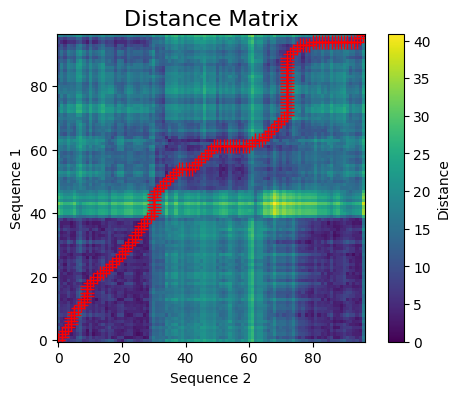

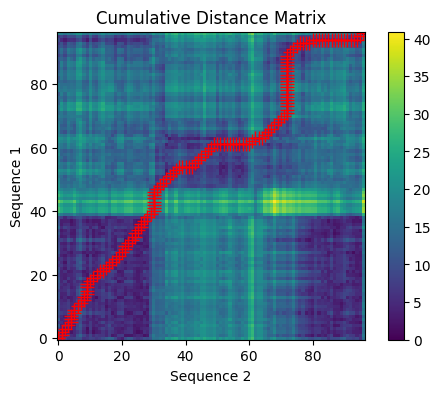

In [13]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
def extract_mfcc(audio_file, numcep=6):
    """
    Extract MFCC features from an audio file.

    Args:
    - audio_file (str): Path to the audio file.
    - numcep (int): Number of MFCC coefficients to extract (default is 13).

    Returns:
    - mfcc_features (numpy.ndarray): 2D array of MFCC features.
    """

    rate, signal = wav.read(audio_file)

    # Extract MFCC features
    mfcc_features = mfcc(signal, rate, numcep=numcep,winlen=0.005)

    return mfcc_features
###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################
def vector_DTW(sequence1,sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################
    N = len(sequence1)
    M = len(sequence2)
    D = np.zeros((N,M))
    P = np.zeros((N,M))
    for i in range(N):
      for j in range(M):
        D[i][j] = np.mean(abs(sequence1[i]-sequence2[j]))

    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix =  np.zeros((N,M))  #Cummulative distance matrix
    DTW_cumulate_Matrix[0][0] = D[0][0]
    for i in range(1,len(sequence1),1):
      DTW_cumulate_Matrix[i][0] = DTW_cumulate_Matrix[i-1][0] + np.mean(abs(sequence1[i]-sequence2[0]))
    for j in range(1,len(sequence2),1):
      DTW_cumulate_Matrix[0][j] = DTW_cumulate_Matrix[0][j-1] + np.mean(abs(sequence1[0]-sequence2[j]))
    #Iterate through the sequence of points in sequences and compute the distance between the sequences.
    for i in range(1,len(sequence1),1): #you can start from 1
        for j in range(1,len(sequence2),1):
            current_distance =  D[i][j]    #Compute the distance between the two points

            DTW_cumulate_Matrix[i][j] = current_distance + min(DTW_cumulate_Matrix[i-1][j],DTW_cumulate_Matrix[i-1][j-1],DTW_cumulate_Matrix[i][j-1])
            P[i][j] = min(DTW_cumulate_Matrix[i-1][j],DTW_cumulate_Matrix[i-1][j-1],DTW_cumulate_Matrix[i][j-1])
            #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"



    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    opt_distance = 0.0
    i =  N-1# length of the sequence1
    j =  M-1# length of the sequence2
    rows = []
    cols = []
    while i!=0 and j!=0: #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
        min_dis = min(DTW_cumulate_Matrix[i-1][j],DTW_cumulate_Matrix[i-1][j-1],DTW_cumulate_Matrix[i][j-1])
        if min_dis == DTW_cumulate_Matrix[i-1][j-1]:
          i = i - 1
          j = j - 1
        elif min_dis == DTW_cumulate_Matrix[i-1][j]:
          i = i - 1
          j = j
        elif min_dis == DTW_cumulate_Matrix[i][j-1]:
          i = i
          j = j - 1

        # Add the current indexes distance
        opt_distance = DTW_cumulate_Matrix[N-1][M-1] #Compute the distance between the points sequence1[i] and sequence2[j]

        #Store the required indexes to obtain the optimal path
        rows.append(i)
        cols.append(j)

    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################
    return opt_distance,rows,cols,D,DTW_cumulate_Matrix



def plotDTWpath(sequence1,sequence2,rows,cols,Distance_matrix,DTW_cumulative_matrix):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################
    N = len(sequence1)
    M = len(sequence2)
    # Set up the figure and adjust the aspect ratio
    plt.figure(figsize=(6, 4))

    # Plot the Distance Matrix with viridis colormap
    plt.imshow(Distance_matrix, origin='lower', cmap='viridis', interpolation='nearest')

    # Add title and adjust font size
    plt.title('Distance Matrix', fontsize=16)

    # Add colorbar with label
    plt.colorbar(label='Distance')

    # Plot the optimal path
    for i in range(len(rows)):
         plt.plot(cols[i], rows[i], 'r+', markersize=10)

    # Plot start and end points
    plt.plot(0, 0, 'r+', markersize=10, linewidth=2, label='Start')
    plt.plot(M-1,N-1, 'r+', markersize=10, linewidth=2, label='End')

    # Add axis labels and adjust font size
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')

    # Add grid lines
    #plt.grid(True)

    plt.show()


    plt.figure(figsize=(6, 4))
    plt.imshow(Distance_matrix, origin='lower', cmap='viridis', interpolation='nearest')
    plt.title('Cumulative Distance Matrix')

    plt.colorbar()
    for i in range(len(rows)):
        plt.plot(cols[i], rows[i], 'r+', markersize=10, linewidth=10)
    plt.plot(0,0,'r+',markersize=10,linewidth=10)
    plt.plot(M-1,N-1,'r+',markersize=10,linewidth=10)

    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')
    #plt.grid()

    plt.show()

    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes

sequence1 = extract_mfcc('/content/drive/MyDrive/Recording_PRML/Bhavitha_recording/recorded_audio_1_2.wav')
sequence2 = extract_mfcc('/content/drive/MyDrive/Recording_PRML/Bhavitha_recording/recorded_audio_4.wav')
opt_dis,rows,cols,Distance_matrix,DTW_cumulative_matrix = vector_dtw(sequence1,sequence2)
print('Testing for different numbers')
plotDTWpath(sequence1,sequence2,rows,cols,Distance_matrix,DTW_cumulative_matrix)

Testing for same numbers


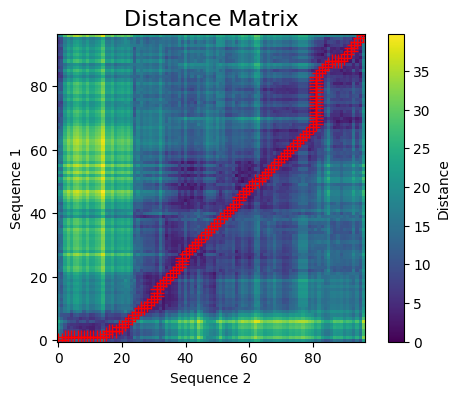

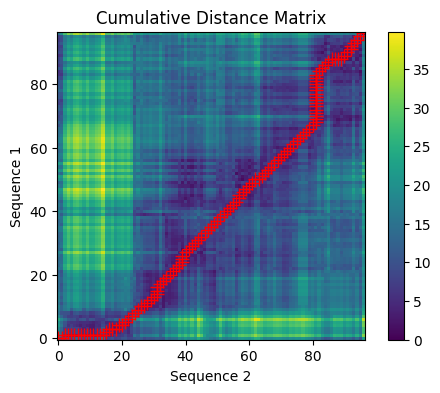

In [14]:
sequence1 = extract_mfcc('/content/drive/MyDrive/Recording_PRML/Bhavitha_recording/recorded_audio_8_1.wav')
sequence2 = extract_mfcc('/content/drive/MyDrive/Recording_PRML/Bhavitha_recording/recorded_audio_8.wav')
opt_dis,rows,cols,Distance_matrix,DTW_cumulative_matrix = vector_dtw(sequence1,sequence2)
print('Testing for same numbers')
plotDTWpath(sequence1,sequence2,rows,cols,Distance_matrix,DTW_cumulative_matrix)

**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

In [55]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
import numpy as np
acc = 0
confusion_matrix = np.zeros((10,10))
for i in range(10):
  for j in range(3):
    audio  = f'recorded_audio_{i+1}_{j+1}.wav'
    sequence1 = extract_mfcc(audio)
    opts_dis = []
    for k in range(10):
      audio  = f'recorded_audio_{k+1}.wav'
      sequence2 = extract_mfcc(audio)
      opt_dis,_,_,_,_ = vector_dtw(sequence2,sequence1)
      opts_dis.append(opt_dis)
    min_index = np.argmin(opts_dis)
    #print(min_index)
    if min_index == i:
      acc += 1
    confusion_matrix[i][min_index] += 1

print('Accuracy',acc*100/30)
print(confusion_matrix)






Accuracy 53.333333333333336
[[2. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 2. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
 [0. 0. 0. 0. 2. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 1. 0. 0.]
 [2. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 2.]]


<b> Report your observations </b>

1.The accuracy is about 53 percentage

2.If I use the same number recording then the deviation from diagonal is less otherwise deviation from diagonal is very high

3.Optimal distance is less for same number recording





<dt> <h4> <b> Part (c): </b> In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  </dt> </h4>

[link to TDIGITS data](https://drive.google.com/drive/folders/1oV3jrUiug0-SwWLOdLtbXA6hzqYYIlI7?usp=sharing)


<dt> <h4> 1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy. </dt> </h4>
<dt> <h4> 2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. </dt> </h4>
<dt> <h4> 3. Please report some of the changes to improve the system performance. </dt> </h4>

In [30]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
#Performance evaluation of Isolated digit recognition system on TDIGITS data
# persons = ['nicolas','yweweler','theo','jackson']
acc = 0
confusion_matrix = np.zeros((10,10))

for i in range(10):
  for j in range(3):
    audio = f'recorded_audio_{i+1}_{j+1}.wav'
    sequence1 = extract_mfcc(audio)
    opts_dis = []
    for k in range(10):
      audio  = f'/content/drive/MyDrive/MultiSpeakerDigitData_temp/MultiSpeakerDigitData_modified/nicolas/{k}_nicolas_0.wav'
      sequence2 = extract_mfcc(audio)
      opt_dis,_,_,_,_ = vector_dtw(sequence2,sequence1)
      opts_dis.append(opt_dis)
    min_index = np.argmin(opts_dis)
    #print(min_index)
    if min_index == i:
      acc += 1
    confusion_matrix[i][min_index] += 1

print('Accuracy of testing my voice with the nicolas data',acc*100/30)
print(confusion_matrix)



Accuracy of testing my voice with the nicolas data 20.0
[[0. 0. 1. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 2. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 2. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
 [0. 0. 0. 0. 0. 2. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 2. 0.]]


In [64]:
#Performance evaluation of Isolated digit recognition system on TDIGITS data
# persons = ['nicolas','yweweler','theo','jackson']
acc = 0
confusion_matrix = np.zeros((10,10))

for i in range(10):
  for j in range(3):
    audio = f'recorded_audio_{i+1}_{j+1}.wav'
    sequence1 = extract_mfcc(audio)
    opts_dis = []
    for k in range(10):
      audio  = f'/content/drive/MyDrive/MultiSpeakerDigitData_temp/MultiSpeakerDigitData_modified/yweweler/{k}_yweweler_0.wav'
      sequence2 = extract_mfcc(audio)
      opt_dis,_,_,_,_ = vector_dtw(sequence2,sequence1)
      opts_dis.append(opt_dis)
    min_index = np.argmin(opts_dis)
    #print(min_index)
    if min_index == i:
      acc += 1
    confusion_matrix[i][min_index] += 1

print('Accuracy of testing my voice with the yweweler data',acc*100/30)
print(confusion_matrix)



Accuracy of testing my voice with the yweweler data 6.666666666666667
[[0. 2. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
 [0. 2. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]]


In [65]:
#Performance evaluation of Isolated digit recognition system on TDIGITS data
# persons = ['nicolas','yweweler','theo','jackson']
acc = 0
confusion_matrix = np.zeros((10,10))

for i in range(10):
  for j in range(3):
    audio = f'recorded_audio_{i+1}_{j+1}.wav'
    sequence1 = extract_mfcc(audio)
    opts_dis = []
    for k in range(10):
      audio  = f'/content/drive/MyDrive/MultiSpeakerDigitData_temp/MultiSpeakerDigitData_modified/theo/{k}_theo_0.wav'
      sequence2 = extract_mfcc(audio)
      opt_dis,_,_,_,_ = vector_dtw(sequence2,sequence1)
      opts_dis.append(opt_dis)
    min_index = np.argmin(opts_dis)
    #print(min_index)
    if min_index == i:
      acc += 1
    confusion_matrix[i][min_index] += 1

print('Accuracy of testing my voice with the theo data',acc*100/30)
print(confusion_matrix)



Accuracy of testing my voice with the theo data 10.0
[[0. 2. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
 [0. 2. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]]


In [66]:
#Performance evaluation of Isolated digit recognition system on TDIGITS data
# persons = ['nicolas','yweweler','theo','jackson']
confusion_matrix = np.zeros((10,10))
acc = 0

for i in range(10):
  for j in range(3):
    audio = f'recorded_audio_{i+1}_{j+1}.wav'
    sequence1 = extract_mfcc(audio)
    opts_dis = []
    for k in range(10):
      audio  = f'/content/drive/MyDrive/MultiSpeakerDigitData_temp/MultiSpeakerDigitData_modified/jackson/{k}_jackson_0.wav'
      sequence2 = extract_mfcc(audio)
      opt_dis,_,_,_,_ = vector_dtw(sequence2,sequence1)
      opts_dis.append(opt_dis)
    min_index = np.argmin(opts_dis)
    #print(min_index)
    if min_index == i:
      acc += 1
    confusion_matrix[i][min_index] += 1

print('Accuracy of testing my voice with the jackson data',acc*100/30)
print(confusion_matrix)



Accuracy of testing my voice with the jackson data 3.3333333333333335
[[0. 0. 0. 0. 0. 3. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0. 0. 0. 0.]
 [0. 2. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:

#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from the same speaker
# Testing with same person

In [33]:
acc = 0
confusion_matrix = np.zeros((10,10))
for i in range(10):
  for j in range(50):
    audio  = f'/content/drive/MyDrive/MultiSpeakerDigitData_temp/MultiSpeakerDigitData_modified/theo/{i}_theo_{j}.wav'
    sequence2 = extract_mfcc(audio)
    opts_dis = []
    for k in range(10):
      audio  = f'/content/drive/MyDrive/MultiSpeakerDigitData_temp/MultiSpeakerDigitData_modified/theo/{k}_theo_0.wav'
      sequence1 = extract_mfcc(audio)
      opt_dis,_,_,_,_ = vector_dtw(sequence2,sequence1)
      opts_dis.append(opt_dis)
    min_index = np.argmin(opts_dis)
    #print(min_index)
    if min_index == i:
      acc += 1
    confusion_matrix[i][min_index] += 1

print('Accuracy theo',acc*100/500)
print(confusion_matrix)


Accuracy theo 91.0
[[49.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 50.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 50.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 50.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 50.  0.  0.  0.  0.  0.]
 [ 0.  9.  0.  0.  0. 41.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0. 43.  0.  6.  0.]
 [ 0. 11.  1.  1.  0.  1.  1. 35.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 50.  0.]
 [ 0. 12.  1.  0.  0.  0.  0.  0.  0. 37.]]


In [34]:
acc = 0
confusion_matrix = np.zeros((10,10))
for i in range(10):
  for j in range(50):
    audio  = f'/content/drive/MyDrive/MultiSpeakerDigitData_temp/MultiSpeakerDigitData_modified/jackson/{i}_jackson_{j}.wav'
    sequence1 = extract_mfcc(audio)
    opts_dis = []
    for k in range(10):
      audio  = f'/content/drive/MyDrive/MultiSpeakerDigitData_temp/MultiSpeakerDigitData_modified/jackson/{k}_jackson_0.wav'
      sequence2 = extract_mfcc(audio)
      opt_dis,_,_,_,_ = vector_dtw(sequence2,sequence1)
      opts_dis.append(opt_dis)
    min_index = np.argmin(opts_dis)
    #print(min_index)
    if min_index == i:
      acc += 1
    confusion_matrix[i][min_index] += 1

print('Accuracy jackson',acc*100/500)
print(confusion_matrix)



Accuracy jackson 83.8
[[49.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 48.  0.  0.  0.  0.  0.  1.  0.  1.]
 [ 5.  0. 44.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. 49.  0.  0.  0.  1.  0.  0.]
 [ 0. 24.  0.  0. 26.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  2. 40.  0.  6.  0.  0.]
 [ 0.  0.  2.  0.  0.  5. 26.  2. 15.  0.]
 [ 0.  0.  0.  0.  0.  2.  0. 47.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 50.  0.]
 [ 0.  3.  0.  0.  0.  4.  0.  3.  0. 40.]]


In [35]:
acc = 0
confusion_matrix = np.zeros((10,10))
for i in range(10):
  for j in range(50):
    audio  = f'/content/drive/MyDrive/MultiSpeakerDigitData_temp/MultiSpeakerDigitData_modified/yweweler/{i}_yweweler_{j}.wav'
    sequence1 = extract_mfcc(audio)
    opts_dis = []
    for k in range(10):
      audio  = f'/content/drive/MyDrive/MultiSpeakerDigitData_temp/MultiSpeakerDigitData_modified/yweweler/{k}_yweweler_0.wav'
      sequence2 = extract_mfcc(audio)
      opt_dis,_,_,_,_ = vector_dtw(sequence2,sequence1)
      opts_dis.append(opt_dis)
    min_index = np.argmin(opts_dis)
    #print(min_index)
    if min_index == i:
      acc += 1
    confusion_matrix[i][min_index] += 1

print('Accuracy yweweler',acc*100/500)
print(confusion_matrix)

Accuracy yweweler 72.0
[[33.  0. 17.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  8.  0.  0.  0.  0.  0.  0.  0. 42.]
 [ 0.  0. 50.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2. 24.  0.  0. 14.  0. 10.  0.]
 [ 0.  0.  2.  0. 46.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 44.  0.  0.  0.  6.]
 [ 0.  0.  1.  0.  0.  0. 39.  0. 10.  0.]
 [ 0.  0. 24.  0.  0.  0.  0. 26.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  9.  0. 41.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0. 49.]]


In [36]:
acc = 0
confusion_matrix = np.zeros((10,10))
for i in range(10):
  for j in range(50):
    audio  = f'/content/drive/MyDrive/MultiSpeakerDigitData_temp/MultiSpeakerDigitData_modified/nicolas/{i}_nicolas_{j}.wav'
    sequence1 = extract_mfcc(audio)
    opts_dis = []
    for k in range(10):
      audio  = f'/content/drive/MyDrive/MultiSpeakerDigitData_temp/MultiSpeakerDigitData_modified/nicolas/{k}_nicolas_0.wav'
      sequence2 = extract_mfcc(audio)
      opt_dis,_,_,_,_ = vector_dtw(sequence2,sequence1)
      opts_dis.append(opt_dis)
    min_index = np.argmin(opts_dis)
    #print(min_index)
    if min_index == i:
      acc += 1
    confusion_matrix[i][min_index] += 1

print('Accuracy nicolas',acc*100/500)
print(confusion_matrix)

Accuracy nicolas 79.8
[[44.  0.  0.  6.  0.  0.  0.  0.  0.  0.]
 [ 0. 34.  0.  0.  1. 11.  1.  1.  2.  0.]
 [ 0.  0. 35. 13.  0.  0.  2.  0.  0.  0.]
 [ 0.  0.  4. 31.  0.  0. 14.  0.  1.  0.]
 [ 0.  0.  0.  0. 48.  0.  0.  0.  2.  0.]
 [ 0.  0.  0.  0.  0. 50.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 45.  0.  5.  0.]
 [ 0.  0.  0.  2.  0.  0. 15. 30.  3.  0.]
 [ 0.  0.  0.  0.  0.  0. 12.  0. 38.  0.]
 [ 0.  0.  0.  1.  0.  4.  0.  0.  1. 44.]]


In [38]:
acc = 0
#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from different speakers
# testing nicolas with ywewelwer
confusion_matrix = np.zeros((10,10))
for i in range(10):
  for j in range(50):
    audio  = f'/content/drive/MyDrive/MultiSpeakerDigitData_temp/MultiSpeakerDigitData_modified/nicolas/{i}_nicolas_{j}.wav'
    sequence1 = extract_mfcc(audio)
    opts_dis = []
    for k in range(10):
      audio  = f'/content/drive/MyDrive/MultiSpeakerDigitData_temp/MultiSpeakerDigitData_modified/yweweler/{k}_yweweler_0.wav'
      sequence2 = extract_mfcc(audio)
      opt_dis,_,_,_,_ = vector_dtw(sequence2,sequence1)
      opts_dis.append(opt_dis)
    min_index = np.argmin(opts_dis)
    #print(min_index)
    if min_index == i:
      acc += 1
    confusion_matrix[i][min_index] += 1

print('Accuracy when 2 different speakers are compared nicolas-yweweler',acc*100/500)
print(confusion_matrix)


Accuracy when 2 different speakers are compared nicolas-yweweler 32.8
[[ 1.  0. 44.  0.  0.  0.  5.  0.  0.  0.]
 [ 0.  0. 13.  0.  0.  0.  0.  0.  0. 37.]
 [ 0.  0. 42.  0.  0.  0.  8.  0.  0.  0.]
 [ 0.  0. 20.  1.  0.  0. 28.  0.  1.  0.]
 [ 0.  0. 38.  0.  1.  1.  2.  0.  0.  8.]
 [ 0.  1.  0.  0.  0.  9.  0.  0.  0. 40.]
 [ 0.  0.  3.  0.  0.  0. 46.  0.  1.  0.]
 [ 0.  0.  7.  0.  0.  0. 38.  5.  0.  0.]
 [ 0.  0.  1.  0.  0.  0. 27.  0. 21.  1.]
 [ 0.  0. 10.  0.  0.  0.  0.  2.  0. 38.]]


In [68]:
acc = 0
#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from different speakers
# testing theo with ywewelwer
confusion_matrix = np.zeros((10,10))
for i in range(10):
  for j in range(50):
    audio  = f'/content/drive/MyDrive/MultiSpeakerDigitData_temp/MultiSpeakerDigitData_modified/theo/{i}_theo_{j}.wav'
    sequence1 = extract_mfcc(audio)
    opts_dis = []
    for k in range(10):
      audio  = f'/content/drive/MyDrive/MultiSpeakerDigitData_temp/MultiSpeakerDigitData_modified/yweweler/{k}_yweweler_0.wav'
      sequence2 = extract_mfcc(audio)
      opt_dis,_,_,_,_ = vector_dtw(sequence2,sequence1)
      opts_dis.append(opt_dis)
    min_index = np.argmin(opts_dis)
    #print(min_index)
    if min_index == i:
      acc += 1
    confusion_matrix[i][min_index] += 1

print('Accuracy when 2 different speakers are compared theo-yweweler',acc*100/500)
print(confusion_matrix)


Accuracy when 2 different speakers are compared theo-yweweler 46.4
[[14.  0. 28.  0.  0.  0.  8.  0.  0.  0.]
 [ 0.  2. 23.  0.  0.  3.  0.  0.  0. 22.]
 [ 0.  0. 37.  0.  0.  0. 13.  0.  0.  0.]
 [ 0.  0. 30. 11.  0.  0.  3.  0.  6.  0.]
 [ 0.  0. 31.  0. 19.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0. 47.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  0. 50.  0.  0.  0.]
 [ 0.  0. 37.  0.  0.  0.  4.  9.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 16.  0. 34.  0.]
 [ 0.  0. 29.  0.  0.  0.  1. 11.  0.  9.]]


In [69]:
acc = 0
#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from different speakers
# testing jackson with ywewelwer
confusion_matrix = np.zeros((10,10))
for i in range(10):
  for j in range(50):
    audio  = f'/content/drive/MyDrive/MultiSpeakerDigitData_temp/MultiSpeakerDigitData_modified/jackson/{i}_jackson_{j}.wav'
    sequence1 = extract_mfcc(audio)
    opts_dis = []
    for k in range(10):
      audio  = f'/content/drive/MyDrive/MultiSpeakerDigitData_temp/MultiSpeakerDigitData_modified/yweweler/{k}_yweweler_0.wav'
      sequence2 = extract_mfcc(audio)
      opt_dis,_,_,_,_ = vector_dtw(sequence2,sequence1)
      opts_dis.append(opt_dis)
    min_index = np.argmin(opts_dis)
    #print(min_index)
    if min_index == i:
      acc += 1
    confusion_matrix[i][min_index] += 1

print('Accuracy when 2 different speakers are compared jackson-yweweler',acc*100/500)
print(confusion_matrix)


Accuracy when 2 different speakers are compared jackson-yweweler 50.2
[[39.  0. 11.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 37.  0.  0.  0.  0.  0.  0. 13.]
 [ 0.  0. 47.  0.  0.  0.  1.  0.  2.  0.]
 [ 0.  0. 37. 11.  0.  0.  0.  0.  2.  0.]
 [ 0.  0. 36.  0.  7.  6.  0.  0.  0.  1.]
 [ 0.  0.  6.  0.  0. 21.  0.  3.  0. 20.]
 [ 0.  0.  1.  0.  0.  0. 33. 14.  2.  0.]
 [ 0.  0. 31.  0.  0.  0.  0. 19.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  5.  0. 45.  0.]
 [ 0.  0. 20.  0.  0.  0.  0.  1.  0. 29.]]


In [67]:
#Suggest some of the changes to improve the system performance.
'''Evaluate various machine learning and deep learning models for digit recognition, such as Hidden Markov Models (HMMs),
 Gaussian Mixture Models (GMMs), Convolutional Neural Networks (CNNs), Recurrent Neural Networks (RNNs), or Transformers.'''

'''Explore different feature extraction techniques beyond MFCCs to capture more discriminative features from the audio signals.'''

'''Combine multiple models using ensemble methods to improve generalization performance and robustness.'''




<b> Report your observations </b>

1.Testing recording with my voice - and with each of the 4 members resulted in very less accuracy

2.Testing recording with the reference and test signal coming from same speakers resulted in high accuracy 75-90 percentage

3.Testing recording with the reference and test signal coming from different speakers resulted in low accuracy between 40-50 percentage

